In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

For df1:

1. Take a look at the data in df1.

In [2]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   200 non-null    object 
 1   x       200 non-null    float64
 2   time    200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [4]:
df1.group.value_counts()

a    102
b     98
Name: group, dtype: int64

In [5]:
df1.x.value_counts(bins=5)

(3.037, 5.518]      68
(5.518, 7.998]      63
(7.998, 10.478]     56
(0.544, 3.037]      10
(10.478, 12.959]     3
Name: x, dtype: int64

In [6]:
df1.time.value_counts()

two    100
one    100
Name: time, dtype: int64

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
x,200.0,6.511559,2.180756,0.556924,4.895169,6.507704,8.261932,12.958625


2. Does x increase from time one to time two?

In [8]:
df1[df1.time=='one'].describe().T

,count,mean,std,min,25%,50%,75%,max
x,100.0,5.726669,1.960576,2.442945,4.546572,5.266279,6.294788,12.958625


In [9]:
df1[df1.time=='two'].describe().T

,count,mean,std,min,25%,50%,75%,max
x,100.0,7.296448,2.11448,0.556924,6.904859,7.891303,8.608649,10.250676


In [10]:
# On average, x is greater for time = two than when time = one

3. Visualize the relationship between x and time.

<AxesSubplot:xlabel='x', ylabel='Count'>

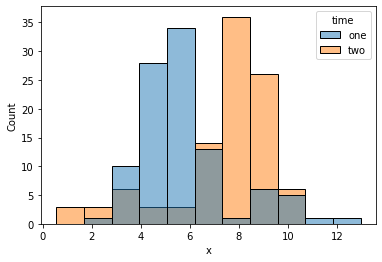

In [11]:
sns.histplot(data=df1,x='x', hue='time')

4. Run a statistical test to further examine the relationship between these features.

In [12]:
x = df1[df1['time']=='one']['x']
y = df1[df1['time']=='two']['x']
stats.mannwhitneyu(x, y)


MannwhitneyuResult(statistic=2600.0, pvalue=2.2741014828327088e-09)

We see that the p-value is small so x at time=one and x at time=two are different.